In [68]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
import yfinance as yf
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [14]:
data = pd.read_csv("TSLA.csv")

In [15]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [16]:
data = data[["Date","Close"]]

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2416 non-null   object 
 1   Close   2416 non-null   float64
dtypes: float64(1), object(1)
memory usage: 37.9+ KB


In [18]:
data.Date = pd.to_datetime(data.Date)

In [19]:
data

,Date,Close
0,2010-06-29,23.889999
1,2010-06-30,23.830000
2,2010-07-01,21.959999
3,2010-07-02,19.200001
4,2010-07-06,16.110001
...,...,...
2411,2020-01-28,566.900024
2412,2020-01-29,580.989990
2413,2020-01-30,640.809998
2414,2020-01-31,650.570007


In [21]:
data.set_index("Date",inplace=True)

In [22]:
data

,Close
Date,
2010-06-29,23.889999
2010-06-30,23.830000
2010-07-01,21.959999
2010-07-02,19.200001
2010-07-06,16.110001
...,...
2020-01-28,566.900024
2020-01-29,580.989990
2020-01-30,640.809998


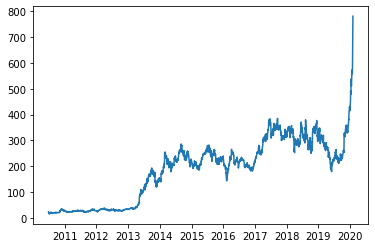

In [23]:
plt.plot(data['Close'])

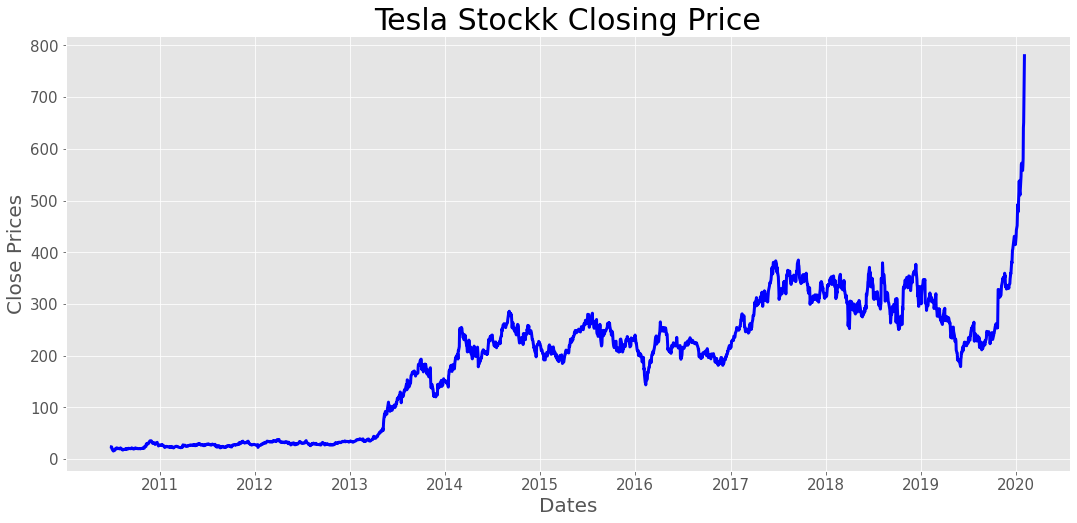

In [24]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Close Prices', fontsize=20)
plt.yticks(fontsize=15)
plt.plot(data['Close'], linewidth=3, color='blue')
plt.title("Tesla Stockk Closing Price", fontsize=30)
plt.show()

<AxesSubplot:xlabel='Close', ylabel='Density'>

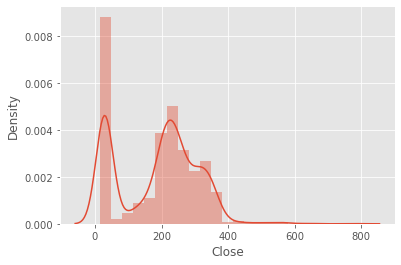

In [25]:
import seaborn as sns
sns.distplot(data['Close'])

<AxesSubplot:xlabel='Close'>

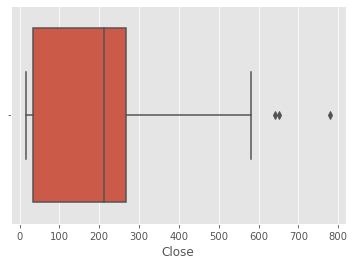

In [26]:
sns.boxplot(data['Close'])

In [36]:
seasonal_dec = seasonal_decompose(data['Close'],period=30)

<Figure size 2160x720 with 0 Axes>

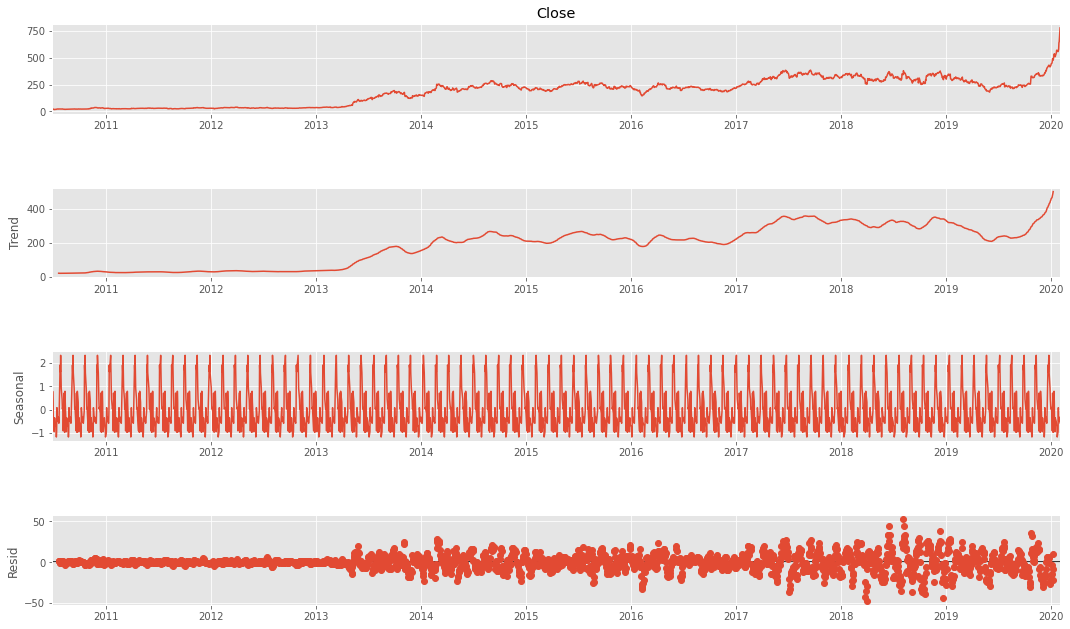

In [37]:
fig=plt.figure(figsize=(30,10))
fig=seasonal_dec.plot()
fig.set_size_inches(17,10)

<Figure size 2160x720 with 0 Axes>

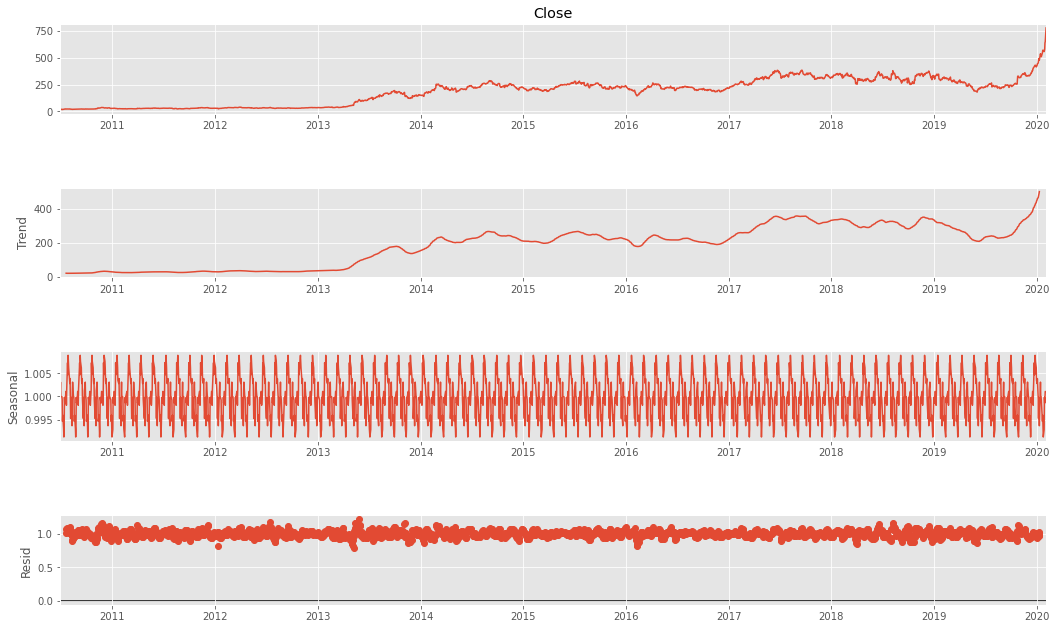

In [31]:
seasonal_dec = seasonal_decompose(data['Close'],model='mulitiplicative',period=30)
fig=plt.figure(figsize=(30,10))
fig=seasonal_dec.plot()
fig.set_size_inches(17,10)

In [40]:
# test for stationarity
def test_stationarity(timeseries):
    # rolling stats
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    # plot stats
    plt.figure(figsize=(18,8))
    plt.grid('both')
    plt.plot(timeseries,color='blue',label="original",linewidth=3)
    plt.plot(rolmean,color='red',label="Rolling Mean",linewidth=3)
    plt.plot(rolstd,color='black',label="Rolling Std",linewidth=3)
    plt.legend(loc='best',fontsize=20,shadow=True,facecolor='lightpink',edgecolor='k')
    plt.title("Rolling Mean and Standard Deviation",fontsize=25)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show(block=False)
    
    print("Results of dicky fuller test")
    adft=adfuller(timeseries,autolag='AIC')
    # output of dft will give us withot defining what the values are.
    # hence we manually write what values doess it explains using a for loop.
    output=pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] = values
    print(output)

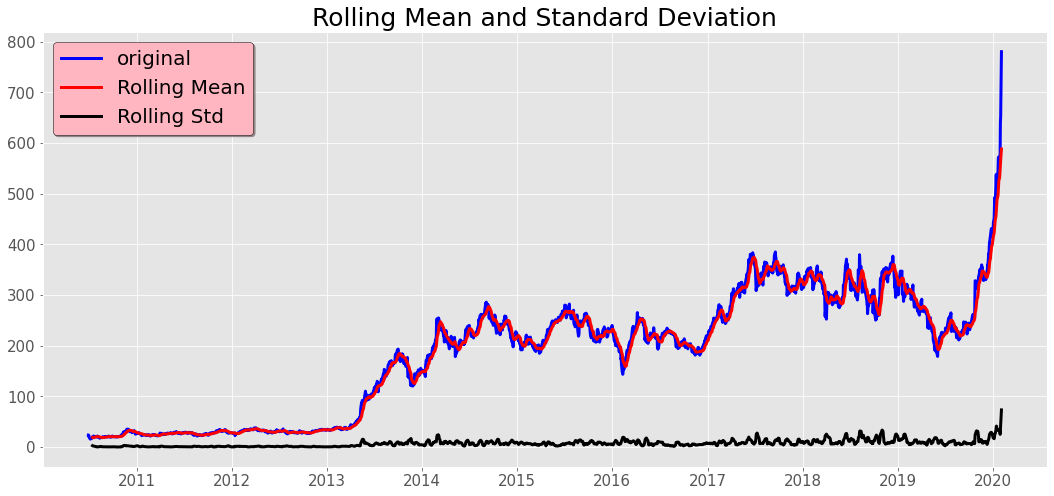

Results of dicky fuller test
Test Statistics                   1.400069
p-value                           0.997114
No. of lags used                 18.000000
Number of observations used    2397.000000
critical value (1%)              -3.433081
critical value (5%)              -2.862747
critical value (10%)             -2.567412
dtype: float64


In [41]:
test_stationarity(data['Close'])

# Preprocessing

In [43]:
df_close = data['Close']

In [44]:
tesla_close_diff1 =df_close.diff()

In [47]:
tesla_close_diff1.dropna(inplace=True)

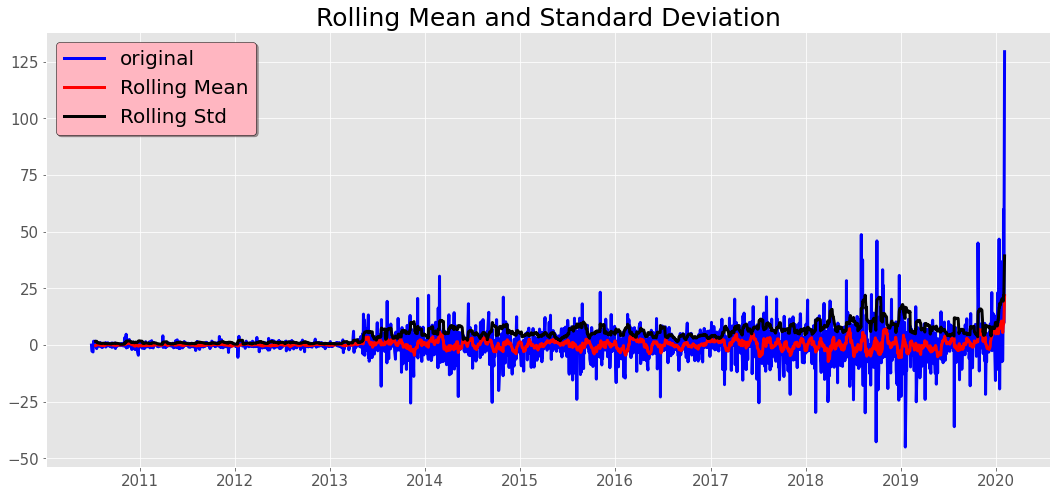

Results of dicky fuller test
Test Statistics               -6.151177e+00
p-value                        7.555858e-08
No. of lags used               1.700000e+01
Number of observations used    2.397000e+03
critical value (1%)           -3.433081e+00
critical value (5%)           -2.862747e+00
critical value (10%)          -2.567412e+00
dtype: float64


In [48]:
test_stationarity(tesla_close_diff1)

## ARIMA

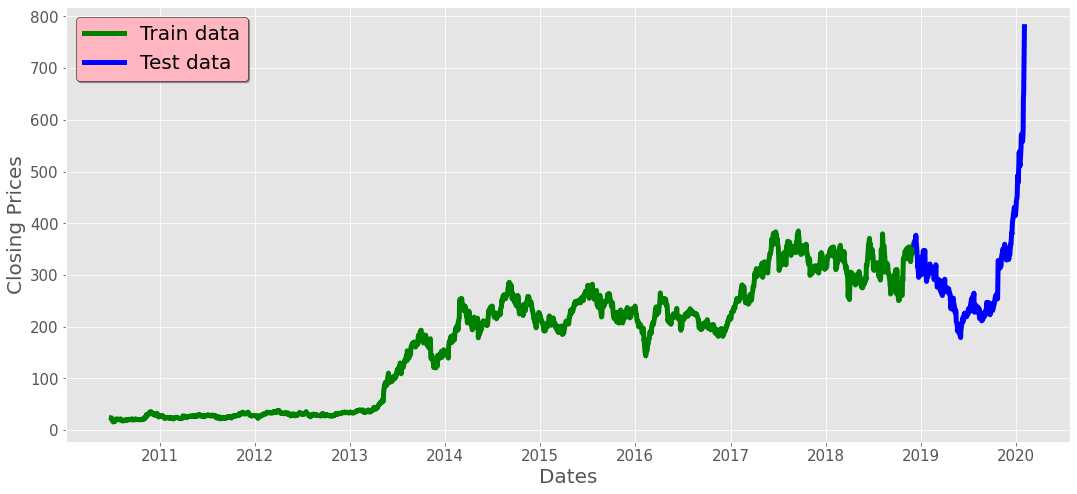

In [56]:
train_data=df_close[:-290]
test_data=df_close[-290:]
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates',fontsize=20)
plt.ylabel('Closing Prices',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(train_data,'green',label='Train data',linewidth=5)
plt.plot(test_data,'blue',label='Test data',linewidth=5)
plt.legend(fontsize=20,shadow=True,facecolor='lightpink',edgecolor='k')

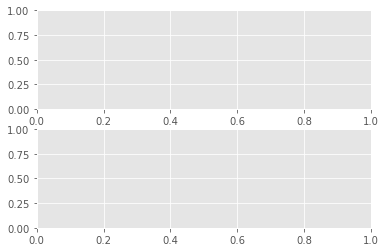

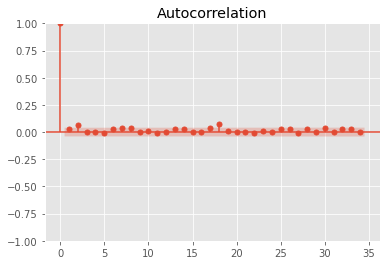

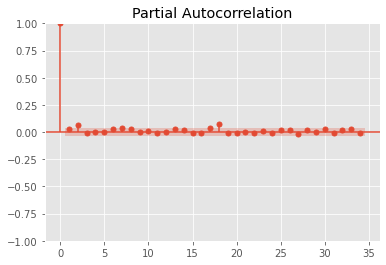

In [61]:
fig, axis = plt.subplots(2)
axis[0] = plot_acf(tesla_close_diff1)
axis[1] = plot_pacf(tesla_close_diff1)

In [63]:
df = pd.concat([df_close,df_close.diff()],axis=1)

In [64]:
df.dropna(inplace=True)

In [65]:
df

,Close,Close
Date,,
2010-06-30,23.830000,-0.059999
2010-07-01,21.959999,-1.870001
2010-07-02,19.200001,-2.759998
2010-07-06,16.110001,-3.090000
2010-07-07,15.800000,-0.310001
...,...,...
2020-01-28,566.900024,8.880004
2020-01-29,580.989990,14.089966
2020-01-30,640.809998,59.820008


In [66]:
df.corr()

,Close,Close
Close,1.000000,0.109915
Close,0.109915,1.000000


In [69]:
model = ARIMA(train_data,order=(1,1,0))

In [71]:
model_fit = model.fit()

In [72]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2126
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -6761.628
Date:                Wed, 15 Feb 2023   AIC                          13527.255
Time:                        07:21:42   BIC                          13538.578
Sample:                             0   HQIC                         13531.400
                               - 2126                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0142      0.012     -1.166      0.243      -0.038       0.010
sigma2        33.9879      0.437     77.769      0.000      33.131      34.845
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8609.66
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):              64.24   Skew:                             0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [93]:
for i in model_fit.forecasts:
    print(i)

[  0.          23.88998747  23.8308516  ... 350.34786919 358.37630006
 359.68283751]


In [96]:
model_fit.forecast(steps=10)

2126    363.012308
2127    363.012985
2128    363.012975
2129    363.012975
2130    363.012975
2131    363.012975
2132    363.012975
2133    363.012975
2134    363.012975
2135    363.012975
Name: predicted_mean, dtype: float64

In [97]:
model_fit.predict()

Date
2010-06-29      0.000000
2010-06-30     23.889987
2010-07-01     23.830852
2010-07-02     21.986541
2010-07-06     19.239175
                 ...    
2018-11-29    347.813931
2018-11-30    341.265109
2018-12-03    350.347869
2018-12-04    358.376300
2018-12-06    359.682838
Name: predicted_mean, Length: 2126, dtype: float64

In [116]:
def evaluate_arima_model(X,y,arima_order):
    history = [x for x in X]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history,order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
        
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y,predictions))
    return rmse

In [119]:
def evaluate_models(dataset,test,p_values,d_values,q_values):
    dataset=dataset.astype('float32')
    best_score,best_cfg=float('inf'),None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order=(p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset,test,order)
                    if rmse < best_score:
                        best_score,best_cfg = rmse,order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg,best_score))

In [120]:
p_values=range(0,3)
d_values=range(0,3)
q_values=range(0,3)
evaluate_models(train_data,test_data,p_values,d_values,q_values)

ARIMA(0, 0, 0) RMSE=148.370
ARIMA(0, 0, 1) RMSE=79.369
ARIMA(0, 0, 2) RMSE=49.423
ARIMA(0, 1, 0) RMSE=12.930
ARIMA(0, 1, 1) RMSE=12.922
ARIMA(0, 1, 2) RMSE=12.922
ARIMA(0, 2, 0) RMSE=15.547
ARIMA(0, 2, 1) RMSE=12.739
ARIMA(0, 2, 2) RMSE=12.748
ARIMA(1, 0, 0) RMSE=12.945
ARIMA(1, 0, 1) RMSE=12.939
ARIMA(1, 0, 2) RMSE=12.940
ARIMA(1, 1, 0) RMSE=12.921
ARIMA(1, 1, 1) RMSE=12.929
ARIMA(1, 1, 2) RMSE=12.922
ARIMA(1, 2, 0) RMSE=13.569
ARIMA(1, 2, 1) RMSE=12.750
ARIMA(1, 2, 2) RMSE=12.740
ARIMA(2, 0, 0) RMSE=12.937
ARIMA(2, 0, 1) RMSE=12.965
ARIMA(2, 0, 2) RMSE=12.929
ARIMA(2, 1, 0) RMSE=12.924
ARIMA(2, 1, 1) RMSE=12.924
ARIMA(2, 1, 2) RMSE=12.907
ARIMA(2, 2, 0) RMSE=13.482
ARIMA(2, 2, 1) RMSE=12.775
ARIMA(2, 2, 2) RMSE=12.744
Best ARIMA(0, 2, 1) RMSE=12.739


In [123]:
history=[x for x in train_data]
predictions=list()
for t in range(len(test_data)):
    model = ARIMA(history,order=(0,2,1))
    model_fit = model.fit()
    yhat = model_fit.forecast(alpha=0.05)[0]
    predictions.append(yhat)
    history.append(test_data[t])
print(np.sqrt(mean_squared_error(test_data,predictions)))

12.739352486497376


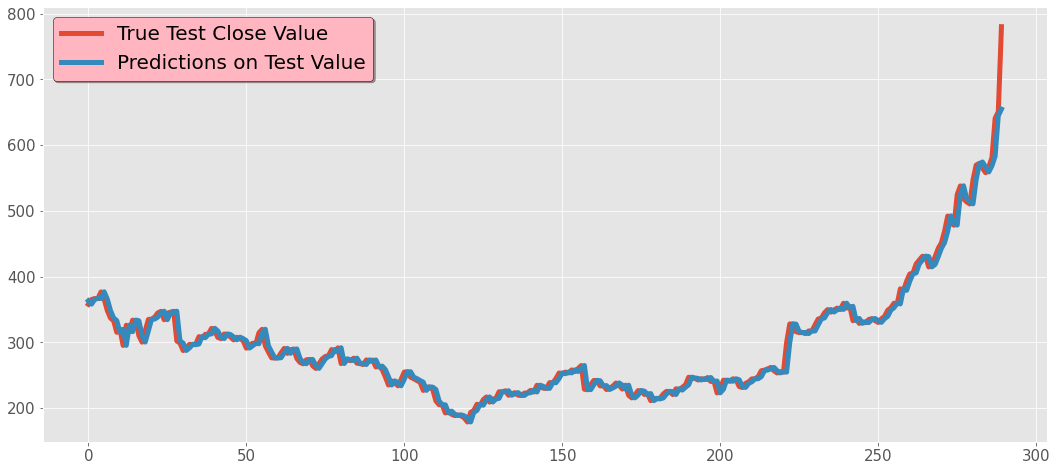

In [124]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data,label="True Test Close Value",linewidth=5)
plt.plot(range(len(predictions)),predictions,label="Predictions on Test Value",linewidth=5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=20, shadow=True, facecolor='lightpink',edgecolor='k')
plt.show()

<Figure size 1296x576 with 0 Axes>

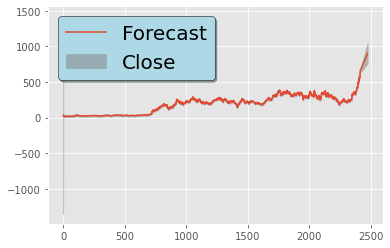

In [126]:
from statsmodels.graphics.tsaplots import plot_predict
fig = plt.figure(figsize=(18,8))
plot_predict(model_fit,start=1,end=len(df_close)+60)
plt.grid("both")
plt.legend(['Forecast','Close','95% confidence interval'],fontsize = 20, shadow=True, facecolor = "lightblue",edgecolor="k")
plt.show()